In [1]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
from scipy import stats
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder

%matplotlib inline


Attribute Information
1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Exploratory Data Analysis

First, let's import the dataset and set it as a pandas dataframe

In [38]:
raw_df = pd.read_csv("healthcare-dataset-stroke-data.csv")
raw_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Exploratory data analysis

The first step is researching and learning about the structure of the date. Firs we will list the columns in our dataset.

In [4]:
raw_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Now we get general insights about the data with the describe method

In [5]:
raw_df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


We found something relevant in the bmi feature. We see that the standard deviation is 7.85, what tell us that date is really close to the mean. However we find that th maximum valu is 97.6 and the 75% quartal is just 33.1, so we have presennce os important outliers here. Something similar is happening in the average glucose level column, but here we have a higher standar deviation.

Now we find null values in our dataset. There are 201 missing values, only in the "bmi" column.

In [6]:
raw_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Now, we proceed to check any duplacate values, finding there are no duplacate values.

In [7]:
raw_df[raw_df.duplicated()].count()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Knowing that there are no duplicate variables, the column id becomes irelevant so we can delete it

In [8]:
raw_df = raw_df.drop(columns= ['id'], axis=1)
raw_df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


We see that the only column with null values is the bmi column with 201 values that represent 3.93% of the data

In [9]:
raw_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
string_col = raw_df.select_dtypes(include="object").columns
raw_df[string_col]=raw_df[string_col].astype("string")

In [11]:
raw_df.dtypes

gender               string[python]
age                         float64
hypertension                  int64
heart_disease                 int64
ever_married         string[python]
work_type            string[python]
Residence_type       string[python]
avg_glucose_level           float64
bmi                         float64
smoking_status       string[python]
stroke                        int64
dtype: object

Now we visualize the distribution of the features, starting with the distributionf of the dependent variable.

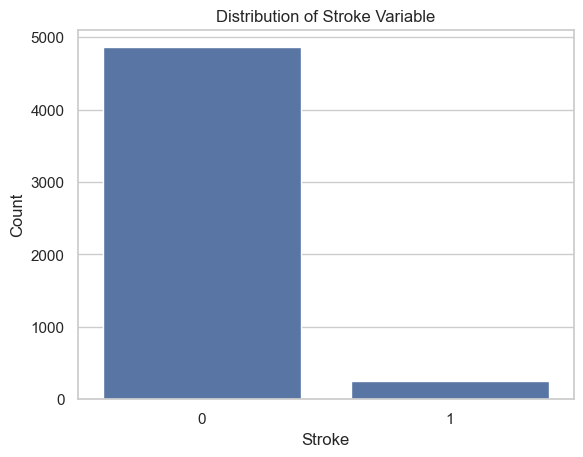

In [12]:
plt.figure()
sns.countplot(x='stroke', data=raw_df)
plt.title('Distribution of Stroke Variable')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

In [13]:
raw_df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

The count plot of the 'stroke' variable shows a significant class imbalance, with far fewer stroke cases than non-stroke cases. This imbalance is crucial to consider because it can affect model performance and the choice of evaluation metrics.

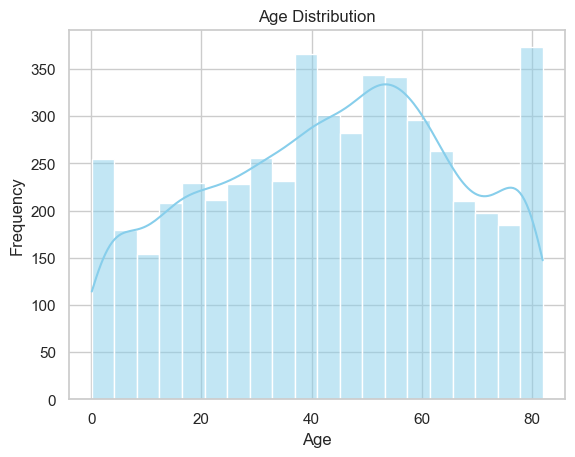

In [14]:
plt.figure()
sns.histplot(data=raw_df, x='age', kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The age distributions shows that most of the individuals are in the range of 40 an 60 years old. The chart let us infere that all the ages presen an acceptable representation in the dataset, which is good to work, consider that age might be an important feature in the prediction.

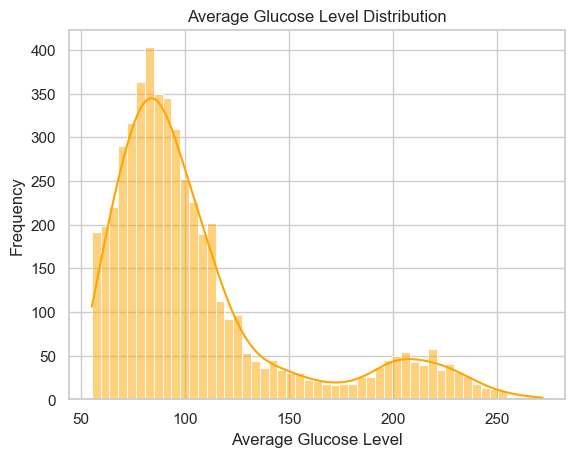

In [15]:
sns.histplot(data=raw_df, x='avg_glucose_level', kde=True, color='orange')
plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.show()

The distribution of average glucose levels is right-skewed with a long tail, indicating that while most individuals have glucose levels in a moderate range, there's a subset with significantly higher values. High glucose levels are a risk factor for stroke, so this variable could be particularly predictive for the positive class.

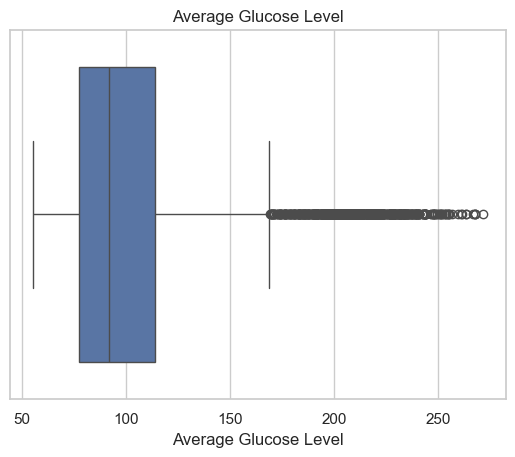

In [16]:
sns.boxplot(x='avg_glucose_level', data=raw_df)
plt.title('Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.show()

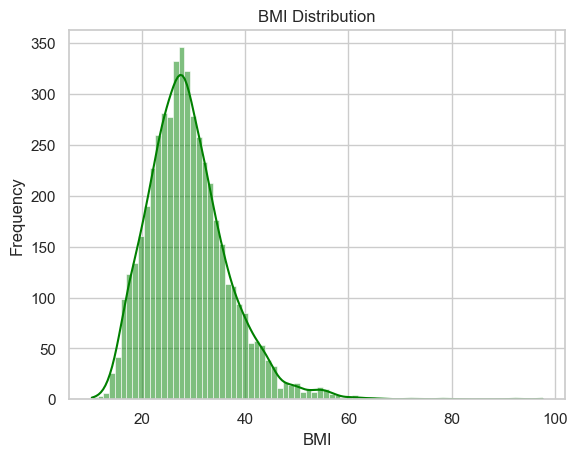

In [17]:
sns.histplot(data=raw_df, x='bmi', kde=True, color='green')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

The distribution of BMI have a normal distribution feeeling what indicates that most of the individuals have BMI in a normal range. However, there are individuals with high BMI giving the right skew we see in the plot what can represent outliers or extreme values.

A box plot, can help us to identify the outliers in this column.

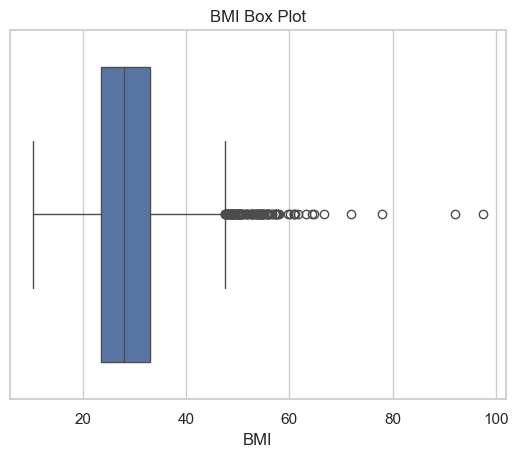

In [18]:
sns.boxplot(x='bmi', data=raw_df)
plt.title('BMI Box Plot')
plt.xlabel('BMI')
plt.show()

As we see, there are outliers in the higher range of the BMI measure and we will need to deal with them before training the model.

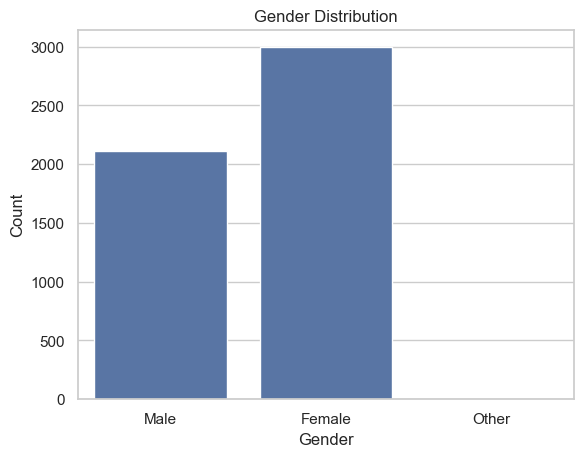

In [19]:
sns.countplot(x='gender', data=raw_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The gender distribution shows that there are more female participants than male in the dataset

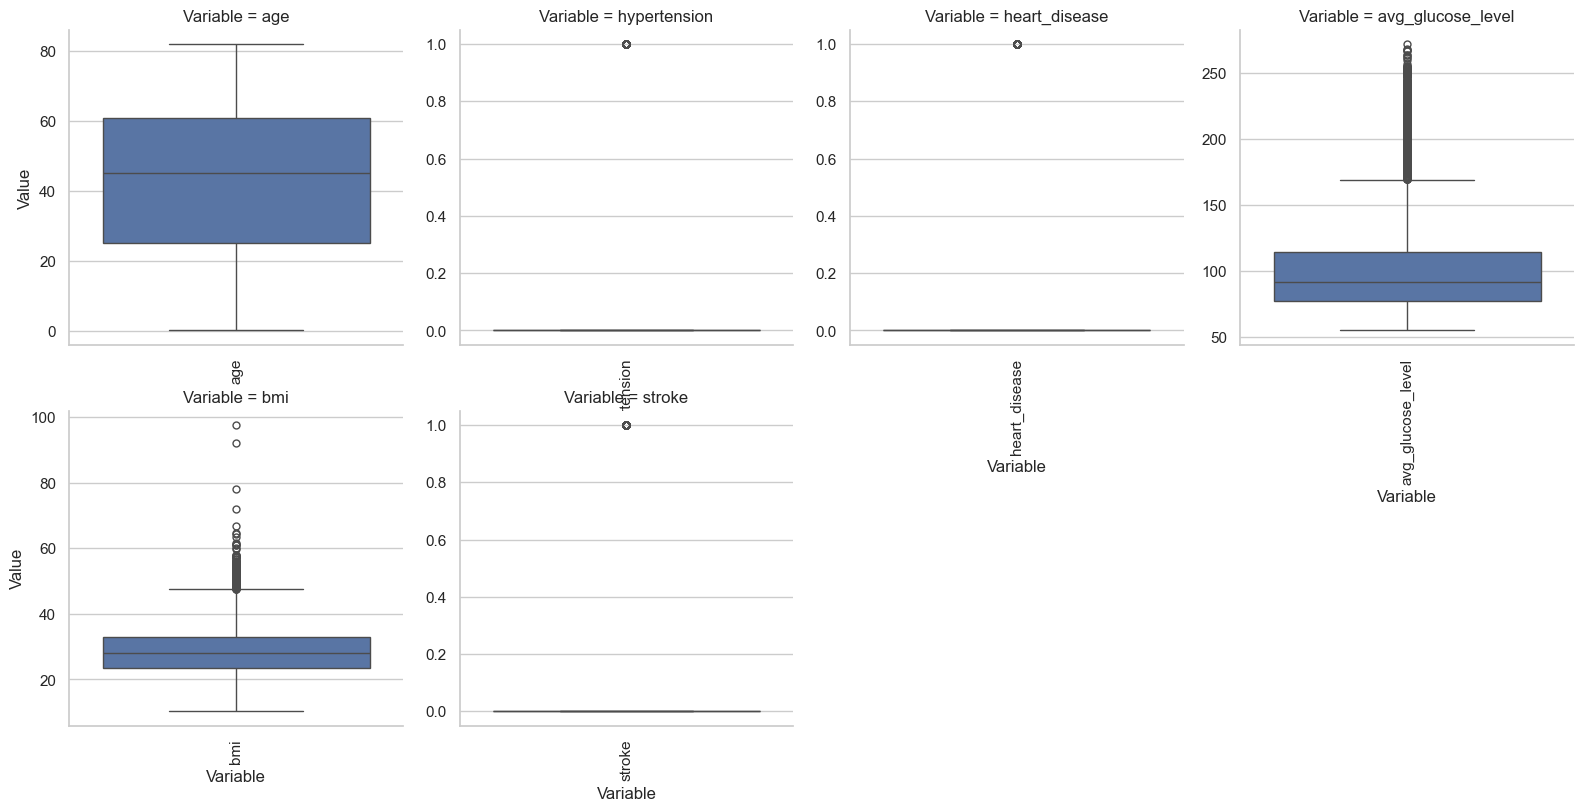

In [20]:
numeric_cols = raw_df.select_dtypes(include=['float64', 'int64']).columns
melted_df = pd.melt(raw_df[numeric_cols], var_name='Variable', value_name='Value')

g = sns.catplot(x='Variable', y='Value', col='Variable',
                data=melted_df, kind='box',
                col_wrap=4, # Adjust based on the number of plots per row
                sharex=False, sharey=False,
                height=4, aspect=1)

g.set_xticklabels(rotation=90)
plt.show()

We can see a bidirectional relationship between features with a seaborn pairplot, however, is hard to notice the positive stroke cases due to the low number of samples in the data.

[]

<Figure size 1500x1000 with 0 Axes>

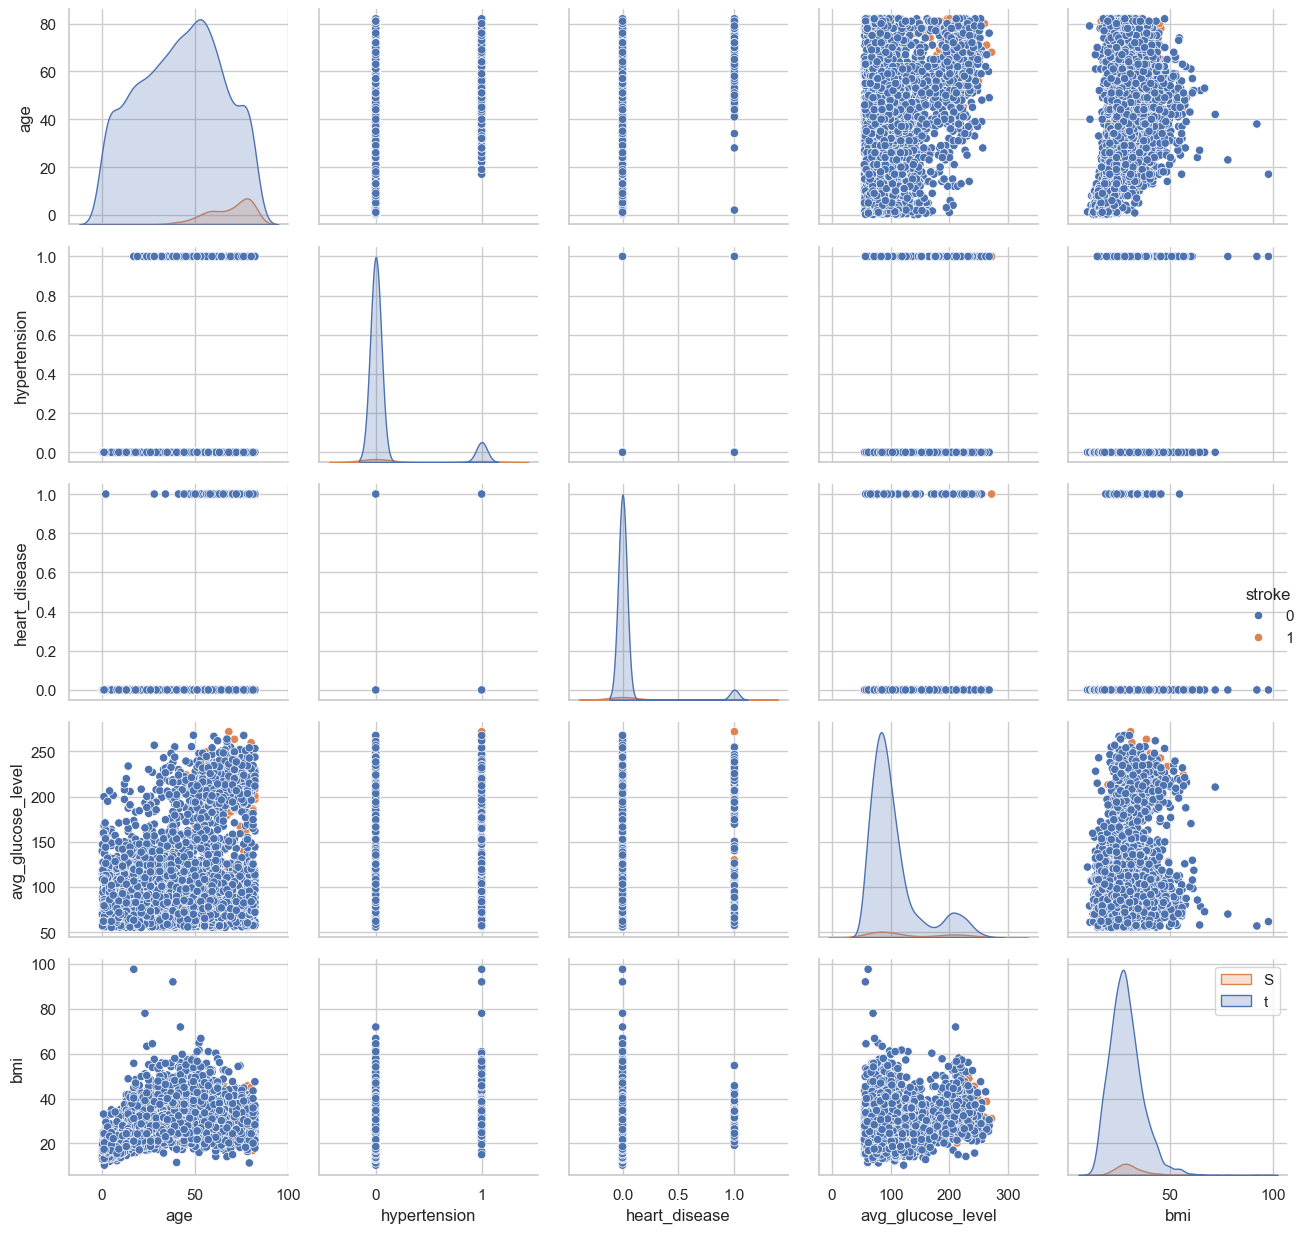

In [21]:
plt.figure(figsize=(15,10))
sns.pairplot(raw_df,hue="stroke", markers = 'o')
plt.legend("Stroke")
plt.tight_layout()
plt.plot()

Finally, for this section of EDA we summarize the distributions of variables, showing some features we haven't cover. Just to get the full picture. 

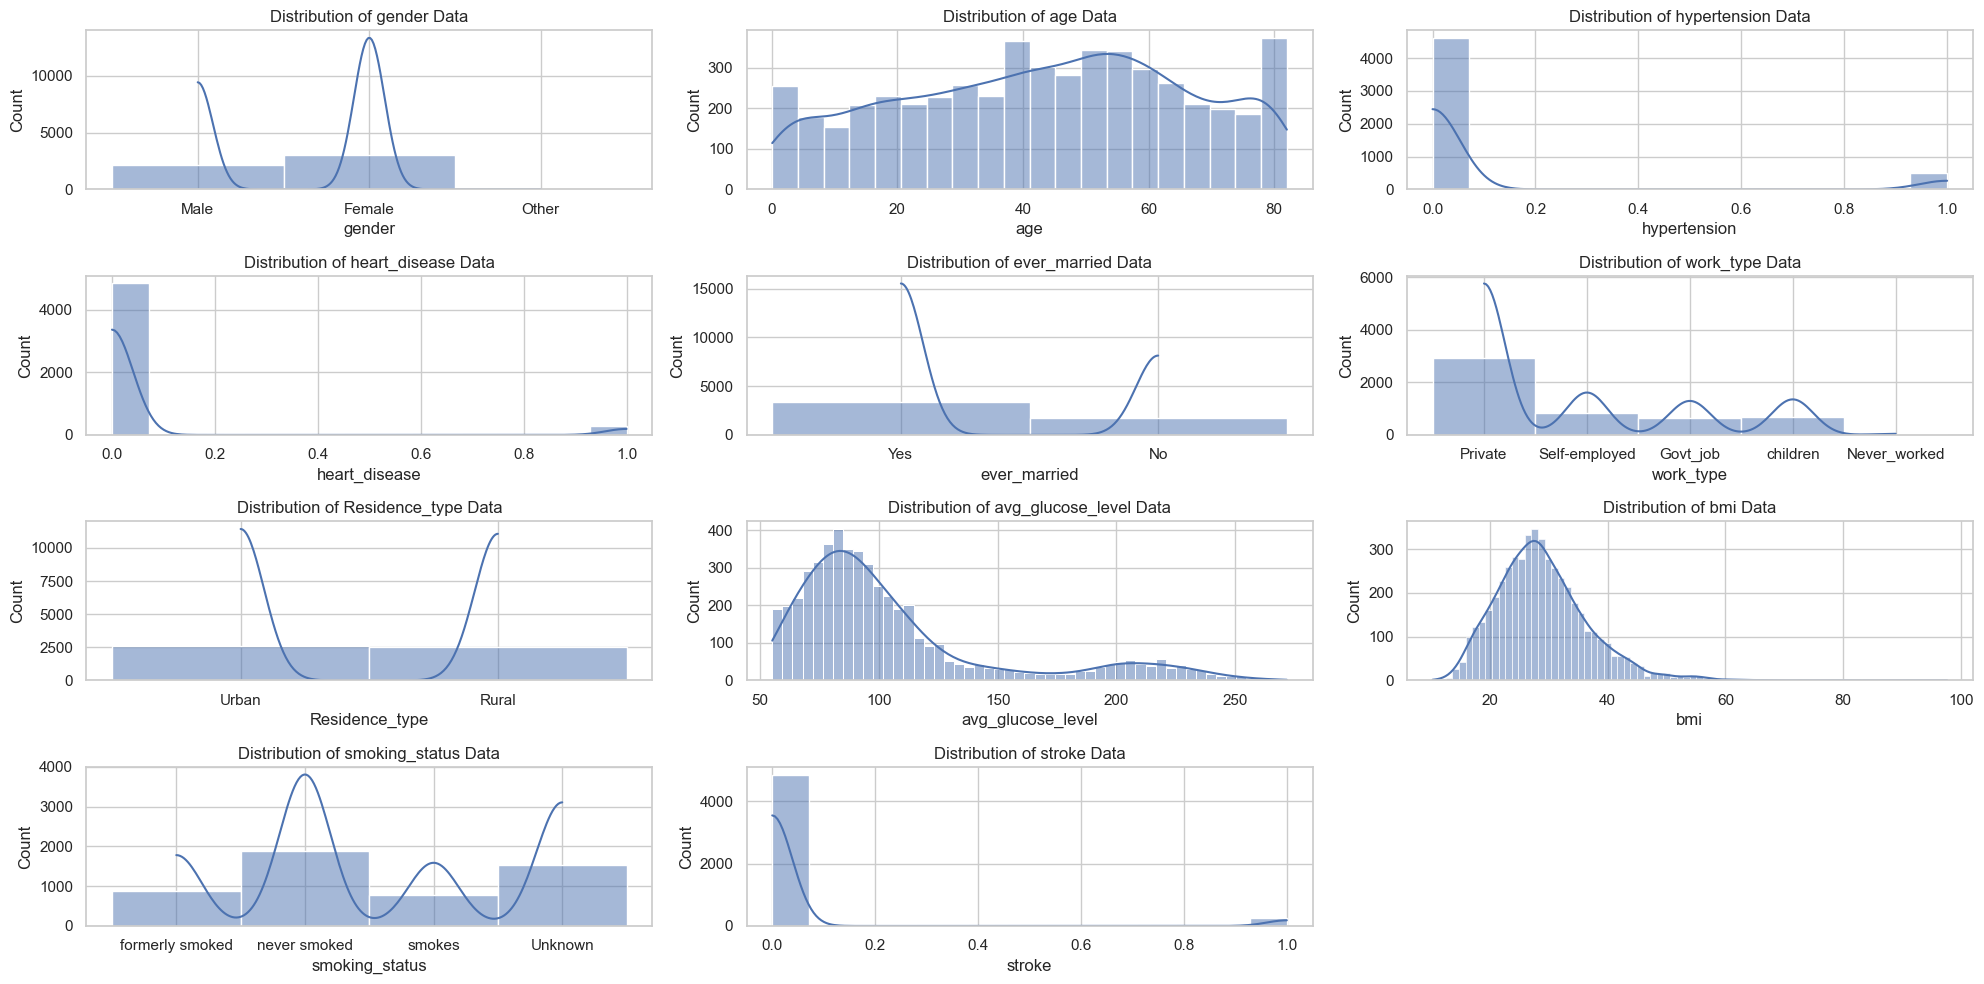

In [22]:
plt.figure(figsize=(20,10))
for i,col in enumerate(raw_df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(raw_df[col],kde=True)
    plt.tight_layout()
    plt.plot()

What we find is that important features such as hypertension or heart disease, present the same imbalance as our dependet variable. This is an initial clue of the importance of these features in order to predict the stroke.

## Data preprocessing

First we are going to deal with the outliers identified in the features "bmi" and "avg_glucose_level". First we are deleting the rows with outliers that don't have stroke positive value. After that we are replacing the outliers of rows that have stroke with the mode.

In [39]:
# bmi outliers elimination

IQR = raw_df["bmi"].quantile(0.75) - raw_df["bmi"].quantile(0.25)
bmi_max_threshold = raw_df["bmi"].quantile(0.75) + 1.5*IQR

drop_values = raw_df[(raw_df["bmi"]> bmi_max_threshold) & (raw_df["stroke"] != 1)].index

raw_df = raw_df.drop(drop_values)

In [41]:
# avg_glucose_level outliers elimination

IQR = raw_df["avg_glucose_level"].quantile(0.75) - raw_df["avg_glucose_level"].quantile(0.25)
avg_glucose_level_max_threshold = raw_df["avg_glucose_level"].quantile(0.75) + 1.5*IQR

drop_values = raw_df[(raw_df["avg_glucose_level"]> avg_glucose_level_max_threshold) & (raw_df["stroke"] != 1)].index

raw_df = raw_df.drop(drop_values)

In [42]:
bmi_mode = raw_df["bmi"].mode()[0]
avg_glucose_level_mode = raw_df["avg_glucose_level"].mode()[0]

raw_df.loc[(raw_df["bmi"]> bmi_max_threshold), "bmi"] = bmi_mode
raw_df.loc[(raw_df["avg_glucose_level"]> avg_glucose_level_max_threshold), "avg_glucose_level"] = avg_glucose_level_mode

In [43]:
raw_df.count()

id                   4393
gender               4393
age                  4393
hypertension         4393
heart_disease        4393
ever_married         4393
work_type            4393
Residence_type       4393
avg_glucose_level    4393
bmi                  4244
smoking_status       4393
stroke               4393
dtype: int64

Now we are addreseing the null values. Due to the class imbalance presented in the dataset we want to keep all the records that present positive stroke. Frist, we are counting how many stroke positive records are with null values in any of the features.

In [44]:
raw_df[(raw_df['stroke'] == 1) & raw_df.isna().any(axis = 1)].count()

id                   40
gender               40
age                  40
hypertension         40
heart_disease        40
ever_married         40
work_type            40
Residence_type       40
avg_glucose_level    40
bmi                   0
smoking_status       40
stroke               40
dtype: int64

In [45]:
df = raw_df.drop(raw_df[(raw_df['stroke'] == 1) & raw_df.isna().any(axis = 1)].index)

df['stroke'].count()


4353

We removed 773 out of the 5110 initial records until now. Now, giving that the missing records are presented only in the BMI feature and the distribution we already saw has a 'normal distribution' apporach, we are replacing the null values with the mode, as we did with the outliers in this feature.

In [46]:
df['bmi'] = df['bmi'].fillna(bmi_mode)

df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [47]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,93.88,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,93.88,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,93.88,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,93.88,29.0,formerly smoked,1


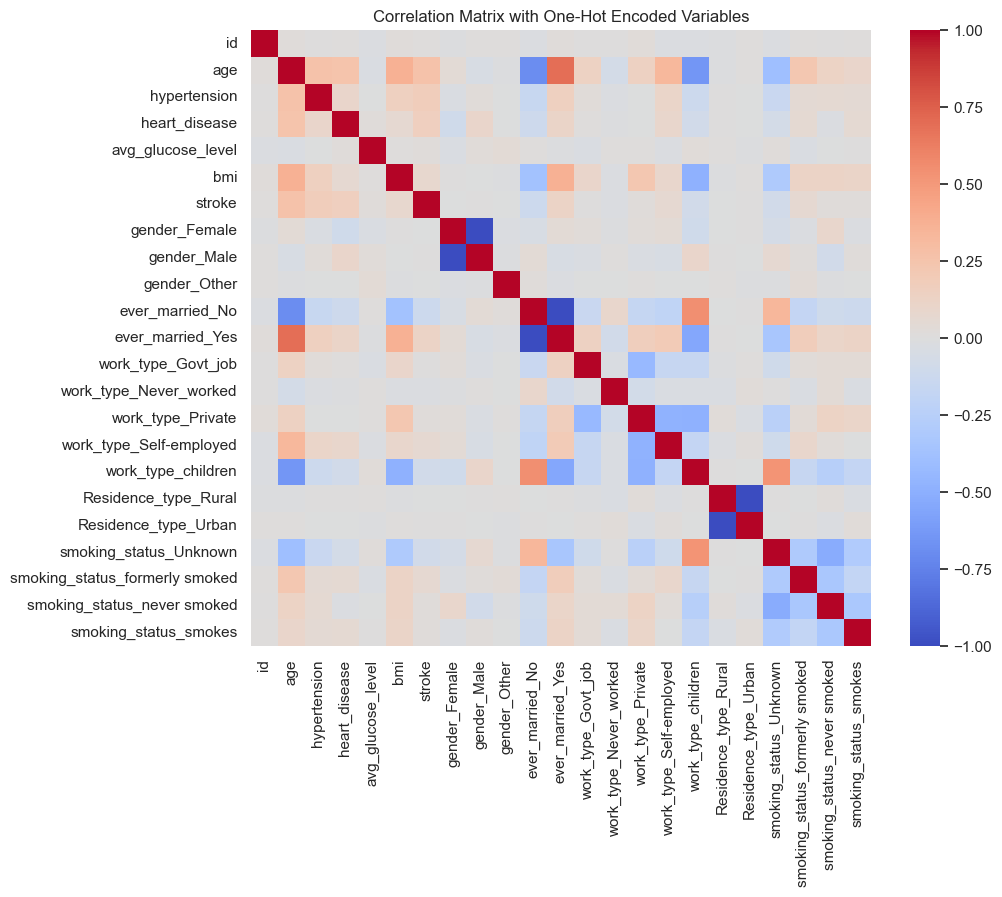

In [48]:
df_encoded = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()
 
# Optionally, use seaborn to visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix with One-Hot Encoded Variables')
plt.show()


In [49]:
df_encoded.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [50]:
df_encoded.drop(columns=['Residence_type_Rural', 'Residence_type_Urban', 'ever_married_No', 'ever_married_Yes' ], inplace=True)

## I. Random Forest algoritm

### 1. Random forest

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and stroke is the target variable

# Separate features and target
X = df_encoded.drop('stroke', axis=1)  # Make sure df is your DataFrame variable
y = df['stroke']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on both the training and testing data
train_predictions = rf_classifier.predict(X_train_scaled)
test_predictions = rf_classifier.predict(X_test_scaled)

# Calculate and print metrics for the training data
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, pos_label=1)
train_f1 = f1_score(y_train, train_predictions, pos_label=1)
train_recall= recall_score(y_train, train_predictions, pos_label=1)

print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print(" ")

print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"F1-Score: {train_f1}")
print(f"recall-Score: {train_recall}\n")

# Calculate and print metrics for the testing data
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, pos_label=1)
test_f1 = f1_score(y_test, test_predictions, pos_label=1)
test_recall= recall_score(y_test, test_predictions, pos_label=1)

print("Testing Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"F1-Score: {test_f1}")
print(f"Recall-Score: {test_recall}\n")

[[818   1]
 [ 43   9]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       819
           1       0.90      0.17      0.29        52

    accuracy                           0.95       871
   macro avg       0.93      0.59      0.63       871
weighted avg       0.95      0.95      0.93       871

 
Training Metrics:
Accuracy: 1.0
Precision: 1.0
F1-Score: 1.0
recall-Score: 1.0

Testing Metrics:
Accuracy: 0.9494833524684271
Precision: 0.9
F1-Score: 0.2903225806451613
Recall-Score: 0.17307692307692307



### 2. Random Forest with smote

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame and stroke is the target variable

# Separate features and target
X = df_encoded.drop('stroke', axis=1)  # Make sure df is your DataFrame variable
y = df['stroke']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally address class imbalance in the training set
smote = SMOTE(k_neighbors=10, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_smote_scaled, y_train_smote)

# Make predictions on the training data
train_predictions = rf_classifier.predict(X_train_smote_scaled)

# Make predictions
predictions = rf_classifier.predict(X_test_scaled)

# Evaluate the model on the training data
print("Training accuracy:", accuracy_score(y_train_smote, train_predictions))
print("Training precision:", precision_score(y_train_smote, train_predictions, pos_label=1))
print("Training F1-score:", f1_score(y_train_smote, train_predictions, pos_label=1))
print("Training Recall:", precision_score(y_train_smote, train_predictions, pos_label=1))

# Evaluate the model on the test data
print("\nTest Metrics:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Test accuracy:", accuracy_score(y_test, predictions))
print("Test precision:", precision_score(y_test.astype(int), predictions.astype(int), pos_label=1))
print("Test F1-score:", f1_score(y_test, predictions, pos_label=1))
print("Test Recall:", precision_score(y_test, predictions, pos_label=1))

Training accuracy: 1.0
Training precision: 1.0
Training F1-score: 1.0
Training Recall: 1.0

Test Metrics:
[[805  14]
 [ 48   4]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       819
           1       0.22      0.08      0.11        52

    accuracy                           0.93       871
   macro avg       0.58      0.53      0.54       871
weighted avg       0.90      0.93      0.91       871

Test accuracy: 0.928817451205511
Test precision: 0.2222222222222222
Test F1-score: 0.11428571428571428
Test Recall: 0.2222222222222222


### 3. Random Forest with Grid-based cross-validation - not Smote

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Assuming df is your DataFrame and stroke is the target variable

# Separate features and target
X = df_encoded.drop('stroke', axis=1)  # Make sure df is your DataFrame variable
y = df['stroke']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# defining the grid of hyperparameters
forest_params = {
    'bootstrap': [True],
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Random Forest classifier
rf_classifier_1 = RandomForestClassifier(random_state=42)

# Using GridSearchCV to obtain the best parameters for the model
cv_rf = GridSearchCV(estimator=rf_classifier_1, param_grid=forest_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV using the training data to find the best parameters
cv_rf.fit(X_train_scaled, y_train)

# Print results
print(f"Best parameters: {cv_rf.best_params_}")
print(f"Best estimator: {cv_rf.best_estimator_ }")
print(f"Best score: {cv_rf.best_score_}")

# Update the parameters of the model by those which are obtained by using GridSearchCV.
rf_classifier_gb = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, random_state=42)

# Train the model
rf_classifier_gb.fit(X_train_scaled,y_train)

# Make predictions on both the training and testing data
train_predictions = rf_classifier_gb.predict(X_train_scaled)
test_predictions = rf_classifier_gb.predict(X_test_scaled)

# Calculate and print metrics for the training data
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, pos_label=1)
train_f1 = f1_score(y_train, train_predictions, pos_label=1)
train_recall= recall_score(y_train, train_predictions)

cm=confusion_matrix(y_test, test_predictions)
print(confusion_matrix(y_test, test_predictions))


print(classification_report(y_test, test_predictions))
print(" ")

print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"F1-Score: {train_f1}")
print(f"Recall: {train_recall}\n")

# Calculate and print metrics for the testing data
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, pos_label=1)
test_f1 = f1_score(y_test, test_predictions)
test_recall= recall_score(y_test, test_predictions,pos_label=1)


print("Testing Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"F1-Score: {test_f1}")
print(f"Recall: {test_recall}\n")


Best parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best estimator: RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42)
Best score: 0.9623785847391944
[[819   0]
 [ 48   4]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       819
           1       1.00      0.08      0.14        52

    accuracy                           0.94       871
   macro avg       0.97      0.54      0.56       871
weighted avg       0.95      0.94      0.92       871

 
Training Metrics:
Accuracy: 0.9695577254451465
Precision: 1.0
F1-Score: 0.49038461538461536
Recall: 0.3248407643312102

Testing Metrics:
Accuracy: 0.9448909299655568
Precision: 1.0
F1-Score: 0.14285714285714285
Recall: 0.07692307692307693



### 4. Random Forest with Grid-based cross-validation and automatic balance classes

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

'''
class_weights = {
    0: 1,   # Keep class 0's weight as is.
    1: 50,  # give more the importance of class 1
}
'''


# Assuming df is your DataFrame and stroke is the target variable

# Separate features and target
X = df_encoded.drop('stroke', axis=1)  # Make sure df is your DataFrame variable
y = df['stroke']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize the Random Forest classifier using hyperparameters
rf_classifier_gb_bal = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, random_state=42)

# Train the model
rf_classifier_gb_bal.fit(X_train_scaled,y_train)

# Make predictions on both the training and testing data
train_predictions = rf_classifier_gb_bal.predict(X_train_scaled)
test_predictions = rf_classifier_gb_bal.predict(X_test_scaled)

# Calculate and print metrics for the training data
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, pos_label=1)
train_f1 = f1_score(y_train, train_predictions, pos_label=1)
train_recall= recall_score(y_train, train_predictions)


cm=confusion_matrix(y_test, test_predictions)
print(confusion_matrix(y_test, test_predictions))

print(classification_report(y_test, test_predictions))
print(" ")

print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"F1-Score: {train_f1}")
print(f"Recall: {train_recall}\n")

# Calculate and print metrics for the testing data
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, pos_label=1)
test_f1 = f1_score(y_test, test_predictions, pos_label=1)
test_recall= recall_score(y_test, test_predictions)

print("Testing Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"F1-Score: {test_f1}")
print(f"Recall: {test_recall}\n")

[[805  14]
 [ 36  16]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       819
           1       0.53      0.31      0.39        52

    accuracy                           0.94       871
   macro avg       0.75      0.65      0.68       871
weighted avg       0.93      0.94      0.94       871

 
Training Metrics:
Accuracy: 0.9885123492245835
Precision: 0.8162162162162162
F1-Score: 0.8830409356725146
Recall: 0.9617834394904459

Testing Metrics:
Accuracy: 0.9425947187141217
Precision: 0.5333333333333333
F1-Score: 0.3902439024390244
Recall: 0.3076923076923077



### 5. Random Forest with Grid-base cross-validation using smote and over sampling 

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import GridSearchCV

# Assuming df is your DataFrame and stroke is the target variable

# Separate features and target
X = df_encoded.drop('stroke', axis=1)  # Make sure df is your DataFrame variable
y = df['stroke']

###############################################################################
# Split the data into training and non-training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply random oversampling to the training dataset
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ros, y_train_ros)

X_train_resampled.count()

# Feature scaling for better performance
scaler = StandardScaler()
X_train_scaled_res = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

###############################################################################
# Initialize the Random Forest classifier
rf_classifier_s = RandomForestClassifier(random_state=42)

In [57]:
# Using GridSearchCV to obtain the best parameters for the model

# defining the grid of hyperparameters
forest_params = {
    'bootstrap': [True],
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
cv_rfs = GridSearchCV(estimator=rf_classifier_s, param_grid=forest_params, cv=5, scoring='accuracy', n_jobs=-1)

In [58]:
# Fit the GridSearchCV using the training data to find the best parameters
cv_rfs.fit(X_train_scaled_res, y_train_ros)

# Make predictions on the training data
train_predictions = cv_rfs.predict(X_train_scaled_res)

# Print results
print(f"Best parameters: {cv_rfs.best_params_}")
print(f"Best estimator: {cv_rfs.best_estimator_ }")
print(f"Best score: {cv_rfs.best_score_}")

Best parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best estimator: RandomForestClassifier(max_depth=20, random_state=42)
Best score: 0.9962406015037596


In [59]:
# Applying the parameters of the model by those which are obtained by using GridSearchCV.
rf_classifier_gbs = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, random_state=42)

# Train the model
rf_classifier_gbs.fit(X_train_scaled_res, y_train_resampled)

# Make predictions on the training data
train_predictions = rf_classifier_gbs.predict(X_train_scaled_res)

# Make predictions on test data
predictions = rf_classifier_gbs.predict(X_test_scaled)



# Evaluate the model on the training data
print("Training accuracy:", accuracy_score(y_train_ros, train_predictions))
print("Training precision:", precision_score(y_train_ros, train_predictions, pos_label=1))
print("Training F1-score:", f1_score(y_train_ros, train_predictions, pos_label=1))
print("Training Recall:", recall_score(y_train_ros, train_predictions, pos_label=1))

# Evaluate the model on the test data
print("\nTest Metrics:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Test accuracy:", accuracy_score(y_test, predictions))
print("Test precision:", precision_score(y_test.astype(int), predictions.astype(int), pos_label=1))
print("Test Recall:", recall_score(y_test.astype(int), predictions.astype(int), pos_label=1))

Training accuracy: 0.9839097744360902
Training precision: 0.9688228438228438
Training F1-score: 0.9841645700754773
Training Recall: 1.0

Test Metrics:
[[779  40]
 [ 28  24]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       819
           1       0.38      0.46      0.41        52

    accuracy                           0.92       871
   macro avg       0.67      0.71      0.69       871
weighted avg       0.93      0.92      0.93       871

Test accuracy: 0.9219288174512055
Test precision: 0.375
Test Recall: 0.46153846153846156


In [ ]:
# The best values of accuraccy got it was with Random Forest using Grid Cross Validation, SMOTE and RandomOverSampling
'''
Training accuracy: 0.9839097744360902
Training precision: 0.9688228438228438
Training F1-score: 0.9841645700754773
Training Recall: 1.0

Test Metrics:
[[779  40]
 [ 28  24]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       819
           1       0.38      0.46      0.41        52

    accuracy                           0.92       871
   macro avg       0.67      0.71      0.69       871
weighted avg       0.93      0.92      0.93       871

Test accuracy: 0.9219288174512055
Test precision: 0.375
Test Recall: 0.46153846153846156

'''

## II. Balancing the classes Using SMOTE, RandomOverSampling and RandomUnderSampling
###### To balance the classes, we are going to apply the techniques:
###### 1. SMOTE: (Synthetic Minority Oversampling Technique): Creates synthetic data points for the minority class based on existing data points in that class. This helps increase the representation of the minority class in the training data.
###### 2. RandomOverSampler: Randomly duplicates data points from the minority class to increase its representation. Unlike SMOTE, it doesn't create synthetic data.
###### 3. RandomUnderSampler: Randomly removes data points from the majority class to reduce its size and match the minority class. This approach can be faster than oversampling techniques.

In [60]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare de data

# Separate features and target
X = df_encoded.drop('stroke', axis=1)  # Make sure df is your DataFrame variable
y = df['stroke']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally address class imbalance in the training set
smote = SMOTE(k_neighbors=10, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Oversample minority class
ros = RandomOverSampler(sampling_strategy='minority')
X_over_resampled, y_over_resampled = ros.fit_resample(X_train_smote, y_train_smote)

# Undersample Majority class
rus = RandomUnderSampler(sampling_strategy='majority')
X_under_resampled, y_under_resampled = rus.fit_resample(X_train_smote, y_train_smote)

# Scale features 
scaler = StandardScaler()

# Scale features smoted
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
# Scale features OS
X_over_resampled_scaled = scaler.fit_transform(X_over_resampled)
# Scale features US
X_under_resampled_scaled = scaler.fit_transform(X_under_resampled)
# Scale test
X_test_scaled = scaler.transform(X_test)


In [61]:
print(X_train_smote_scaled.shape,y_train_smote.shape)
print(X_over_resampled_scaled.shape,y_over_resampled.shape)
print(X_under_resampled_scaled.shape,y_under_resampled.shape)

(6650, 18) (6650,)
(6650, 18) (6650,)
(6650, 18) (6650,)


In [62]:
print(y_train_smote.value_counts())
print(y_over_resampled.value_counts())
print(y_under_resampled.value_counts())

stroke
0    3325
1    3325
Name: count, dtype: int64
stroke
0    3325
1    3325
Name: count, dtype: int64
stroke
0    3325
1    3325
Name: count, dtype: int64


##### Random Forest with SMOTE

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Initialize the Random Forest classifier
RF1 = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
RF1.fit(X_train_smote_scaled,y_train_smote)

# Make predictions on both the training and testing data
train_predictions = RF1.predict(X_train_smote_scaled)
test_predictions = RF1.predict(X_test_scaled)


In [64]:
print("########### Random Forest with SMOTE ###########\n")
# Calculate and print metrics for the training data
train_accuracy = accuracy_score(y_train_smote, train_predictions)
train_precision = precision_score(y_train_smote, train_predictions, pos_label=1)
train_f1 = f1_score(y_train_smote, train_predictions, pos_label=1)
train_recall= recall_score(y_train_smote, train_predictions, pos_label=1)

print(" ")
print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"F1-Score: {train_f1}")
print(f"Recall: {train_recall}\n")

print(confusion_matrix(y_train_smote, train_predictions))

# Calculate and print metrics for the testing data
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, pos_label=1)
test_f1 = f1_score(y_test, test_predictions)
test_recall= recall_score(y_test, test_predictions,pos_label=1)

print(" ")
print("Testing Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"F1-Score: {test_f1}")
print(f"Recall: {test_recall}\n")

print(confusion_matrix(y_test, test_predictions))

print(classification_report(y_test, test_predictions))

#print(classification_report(y_test,y_pred))
#ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

########### Random Forest with SMOTE ###########

 
Training Metrics:
Accuracy: 1.0
Precision: 1.0
F1-Score: 1.0
Recall: 1.0

[[3325    0]
 [   0 3325]]
 
Testing Metrics:
Accuracy: 0.928817451205511
Precision: 0.2222222222222222
F1-Score: 0.11428571428571428
Recall: 0.07692307692307693

[[805  14]
 [ 48   4]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       819
           1       0.22      0.08      0.11        52

    accuracy                           0.93       871
   macro avg       0.58      0.53      0.54       871
weighted avg       0.90      0.93      0.91       871



#### Random Forest with OverSampling and SMOTE

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Initialize the Random Forest classifier
RF2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
RF2.fit(X_over_resampled_scaled,y_over_resampled)

# Make predictions on both the training and testing data
train_predictions2 = RF2.predict(X_over_resampled_scaled)
test_predictions2 = RF2.predict(X_test_scaled)


In [66]:
print("########### Random Forest with OverSampling and SMOTE ###########\n")

# Calculate and print metrics for the training data
train_accuracy2 = accuracy_score(y_over_resampled, train_predictions2)
train_precision2 = precision_score(y_over_resampled, train_predictions2, pos_label=1)
train_f1_2 = f1_score(y_over_resampled, train_predictions2, pos_label=1)
train_recall2= recall_score(y_over_resampled, train_predictions2, pos_label=1)

print(" ")
print("Training Metrics:")
print(f"Accuracy: {train_accuracy2}")
print(f"Precision: {train_precision2}")
print(f"F1-Score: {train_f1_2}")
print(f"Recall: {train_recall2}\n")

print(confusion_matrix(y_over_resampled, train_predictions2))

# Calculate and print metrics for the testing data
test_accuracy2 = accuracy_score(y_test, test_predictions2)
test_precision2 = precision_score(y_test, test_predictions2, pos_label=1)
test_f1_2 = f1_score(y_test, test_predictions2)
test_recall2= recall_score(y_test, test_predictions2,pos_label=1)

print(" ")
print("Testing Metrics:")
print(f"Accuracy: {test_accuracy2}")
print(f"Precision: {test_precision2}")
print(f"F1-Score: {test_f1_2}")
print(f"Recall: {test_recall2}\n")

print(confusion_matrix(y_test, test_predictions2))

print(classification_report(y_test, test_predictions2))

########### Random Forest with OverSampling and SMOTE ###########

 
Training Metrics:
Accuracy: 1.0
Precision: 1.0
F1-Score: 1.0
Recall: 1.0

[[3325    0]
 [   0 3325]]
 
Testing Metrics:
Accuracy: 0.928817451205511
Precision: 0.2222222222222222
F1-Score: 0.11428571428571428
Recall: 0.07692307692307693

[[805  14]
 [ 48   4]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       819
           1       0.22      0.08      0.11        52

    accuracy                           0.93       871
   macro avg       0.58      0.53      0.54       871
weighted avg       0.90      0.93      0.91       871



#### Random Forest with UnderSample and SMOTE

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Initialize the Random Forest classifier
RF3 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
RF3.fit(X_under_resampled_scaled,y_under_resampled)

# Make predictions on both the training and testing data
train_predictions3 = RF3.predict(X_under_resampled_scaled)
test_predictions3 = RF3.predict(X_test_scaled)

In [68]:
print("########### Random Forest with UnderSampling and SMOTE ###########\n")

# Calculate and print metrics for the training data
train_accuracy3 = accuracy_score(y_under_resampled, train_predictions3)
train_precision3 = precision_score(y_under_resampled, train_predictions3, pos_label=1)
train_f1_3 = f1_score(y_under_resampled, train_predictions3, pos_label=1)
train_recall3= recall_score(y_under_resampled, train_predictions3, pos_label=1)

print(" ")
print("Training Metrics:")
print(f"Accuracy: {train_accuracy3}")
print(f"Precision: {train_precision3}")
print(f"F1-Score: {train_f1_3}")
print(f"Recall: {train_recall3}\n")

print(confusion_matrix(y_under_resampled, train_predictions3))

# Calculate and print metrics for the testing data
test_accuracy3 = accuracy_score(y_test, test_predictions3)
test_precision3 = precision_score(y_test, test_predictions3, pos_label=1)
test_f1_3 = f1_score(y_test, test_predictions3)
test_recall3= recall_score(y_test, test_predictions3,pos_label=1)

print(" ")
print("Testing Metrics:")
print(f"Accuracy: {test_accuracy3}")
print(f"Precision: {test_precision3}")
print(f"F1-Score: {test_f1_3}")
print(f"Recall: {test_recall3}\n")

print(confusion_matrix(y_test, test_predictions3))

print(classification_report(y_test, test_predictions3))

########### Random Forest with UnderSampling and SMOTE ###########

 
Training Metrics:
Accuracy: 1.0
Precision: 1.0
F1-Score: 1.0
Recall: 1.0

[[3325    0]
 [   0 3325]]
 
Testing Metrics:
Accuracy: 0.9322617680826636
Precision: 0.3157894736842105
F1-Score: 0.16901408450704225
Recall: 0.11538461538461539

[[806  13]
 [ 46   6]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       819
           1       0.32      0.12      0.17        52

    accuracy                           0.93       871
   macro avg       0.63      0.55      0.57       871
weighted avg       0.91      0.93      0.92       871

